In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.__version__

'0.9.0'

In [3]:
np.random.seed(42) # setting a random seed

#### feeding some data

In [4]:
data0 = np.random.randn(200)

mean, cov = [0, 1], [(1, .5), (.5, 1)]
data1 = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data1, columns=["x", "y"])

iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
anscombe = sns.load_dataset("anscombe")

# 1. Visualizing the distribution of a data

## 1.1 Univariate 
distplot - draw a histogram along with fitting a Kernel Density Estimate (KDE) 

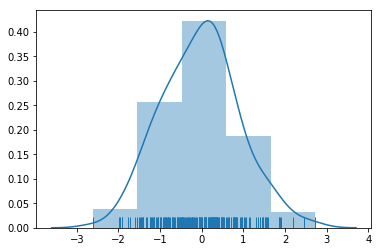

In [5]:
sns.distplot(data0, bins=5, 
             hist=True, # whether to show histogram or not
             kde=True, # whether to fit KDE line or not <=> alternate of kdeplot
             rug=True)  # vertical lines on each observation <=> alternate of rugplot

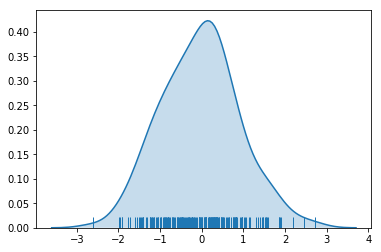

In [6]:
sns.rugplot(data0)
sns.kdeplot(data0,shade=True)

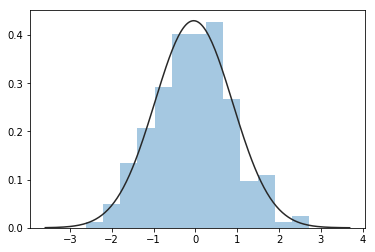

In [7]:
# we can also compare our given data to the default distribution data using distplot as shown
sns.distplot(data0, 
             kde=False, # better to keep it False to see the effect of real fit
             fit=sp.stats.norm)

## 1.2 Bivariate 
Scatter plot - using jointplot  
Hexbin plot - shows the count of observations that fall within hexagonal bins  
KDE plot - contour plot

#### Scatter plot

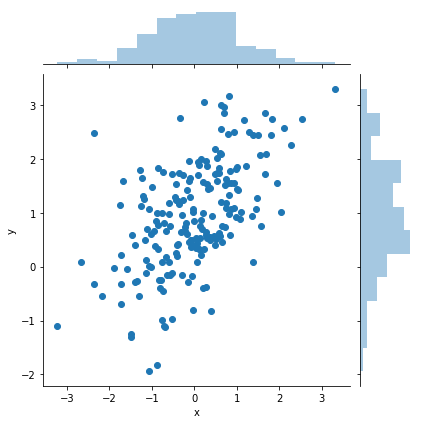

In [8]:
sns.jointplot(x="x", y="y", data=df)

#### Hexbin plot

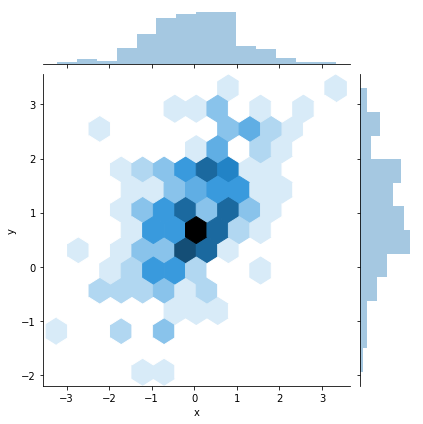

In [9]:
sns.jointplot(x="x", y="y", data=df, kind="hex")

#### KDE plot

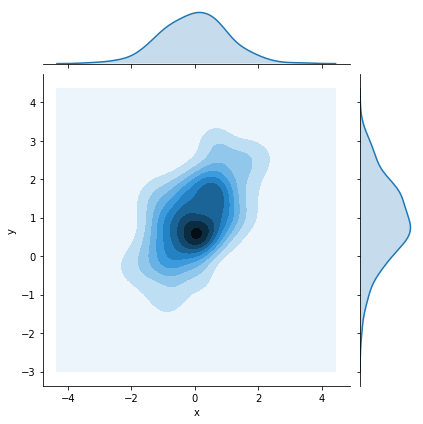

In [10]:
sns.jointplot(x="x", y="y", data=df, kind='kde')

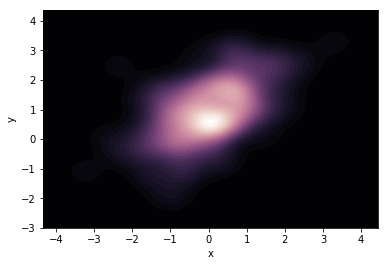

In [11]:
# more dense contour KDE plot
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

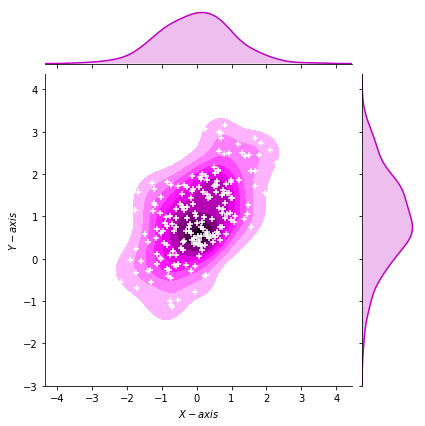

In [12]:
# Jointplot uses JointGrid (saved in variable jg) through which we can perform many other variations as shown
jg = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")

jg.plot_joint(plt.scatter, c="w", s=30, marker="+")
jg.ax_joint.collections[0].set_alpha(0)
jg.set_axis_labels("$X-axis$", "$Y-axis$");

## 1.3 Pairwise relationship
pairplot

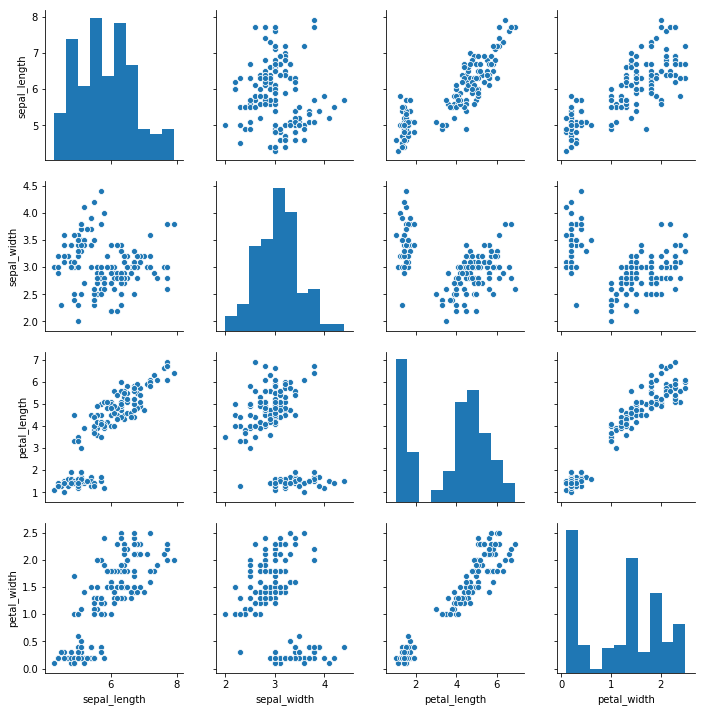

In [13]:
sns.pairplot(iris)

#### For advanced knowledge study the following -
1. JointGrid: https://seaborn.pydata.org/generated/seaborn.JointGrid.html
2. PairGrid: https://seaborn.pydata.org/generated/seaborn.PairGrid.html

# 2. Categorical data

## 2.1 Categorical scatter plot
stripplot - provides scatter plot of quantitative vs qualitative data    
swarmplot - provides scatter plot of quantitative vs qualitative data (by overcoming duplicates)

#### Stripplot

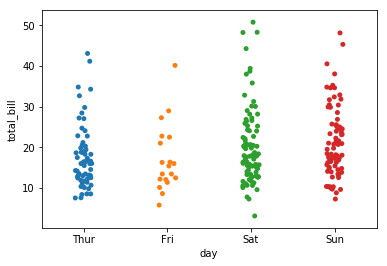

In [14]:
sns.stripplot(x="day", y="total_bill", data=tips)

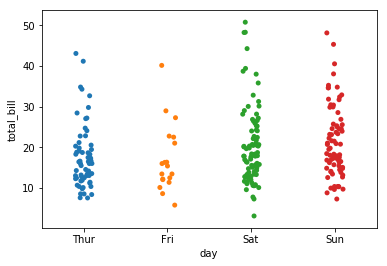

In [15]:
# overcoming the duplicates by introducing some randomness
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True) 

#### Swarmplot

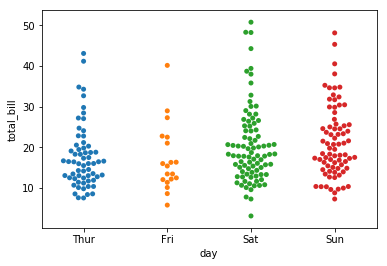

In [16]:
sns.swarmplot(x="day", y="total_bill", data=tips) # removes duplicates without random data; uses some algo

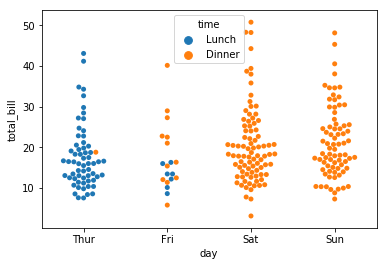

In [17]:
sns.swarmplot(x="day", y="total_bill", hue="time", data=tips) # multiple data on same plot

## 2.2 Distributions of observations within categories
Boxplot  
Violinplot - combine boxplot + KDE plot

#### boxplot

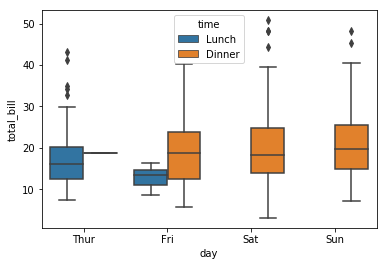

In [18]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips) # multiple data on same plot

#### violin plot

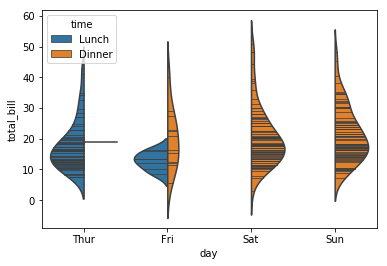

In [19]:
sns.violinplot(x="day", y="total_bill", hue="time", data=tips, 
               split=True,  # Mark True to join both the category plots
               inner="stick") # Shows original observations

#### combination of violin plot and swarm plot can give more interactive results

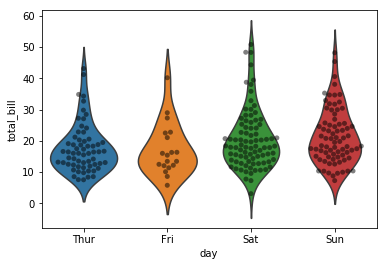

In [20]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="k", alpha=.5);

## 2.3 Statistical estimation within categories
Barplot  
Countplot - to show freq. of each category  
Pointplot - shows a point connectivity among the categories along with confidence interval estimates

#### barplot

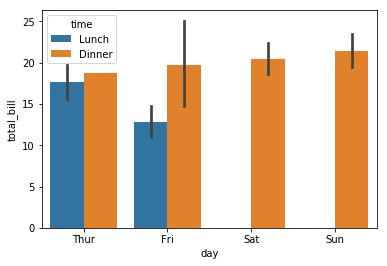

In [21]:
sns.barplot(x="day", y="total_bill", hue="time", data=tips) 

#### countplot

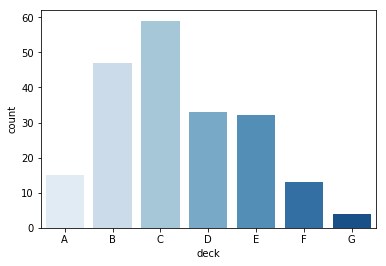

In [22]:
sns.countplot(x="deck", data=titanic, palette="Blues")

#### point plot

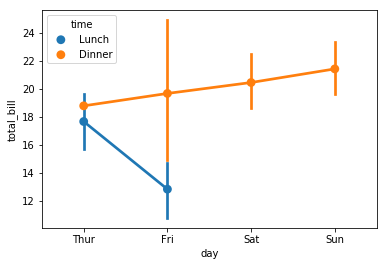

In [23]:
sns.pointplot(x="day", y="total_bill", hue="time", data=tips) 

#### for advanced knowledge study the following -
factorplot: https://seaborn.pydata.org/generated/seaborn.factorplot.html  
FacetGrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

# 3. Visualizing linear relationship
lmplot - for linear, polynomial and logistic regression  
residplot - for residual plot

#### lmplot

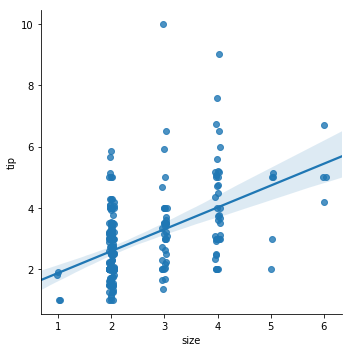

In [24]:
# consider fitting a linear regression on a quantitative vs qualitative data as shown
sns.lmplot(x="size", y="tip", data=tips, 
           x_jitter=.05)  # little randomness can be added to make the distribution 
                        # of those values much clear without changing the reg. line

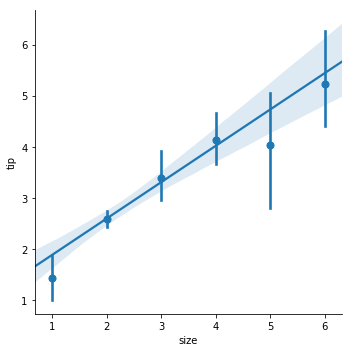

In [25]:
# or we can just apply an estimator (e.g. mean)
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

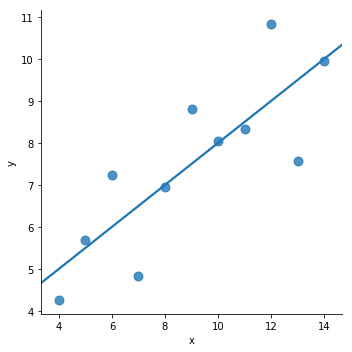

In [26]:
# Fitting a linear regression line
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           fit_reg=True,  # Whether to draw the line or not!!
           ci=None,  # Allow confidence interval!!
           scatter_kws={"s": 80})  # size of points

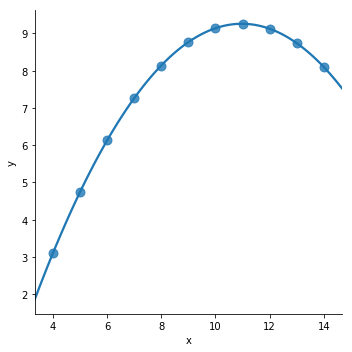

In [27]:
# Fitting a polynomial regression curve
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, # define your order here           
           scatter_kws={"s": 80});

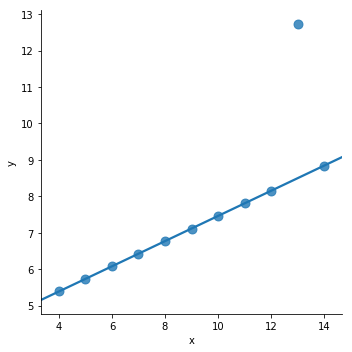

In [28]:
# Overcoming outliers by building a robust fit line 
# (It uses a different loss function to downweight relatively large residuals)
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

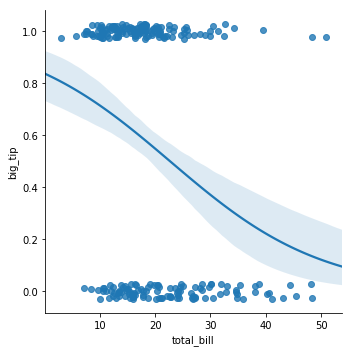

In [29]:
# Fitting a logistic regression curve
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

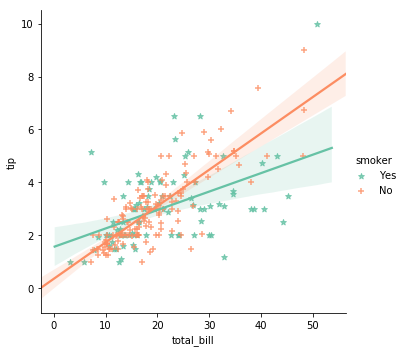

In [30]:
# Multiple variable on same figure
sns.lmplot(x="total_bill", y="tip", hue="smoker", markers=["*","+"], palette="Set2", data=tips)

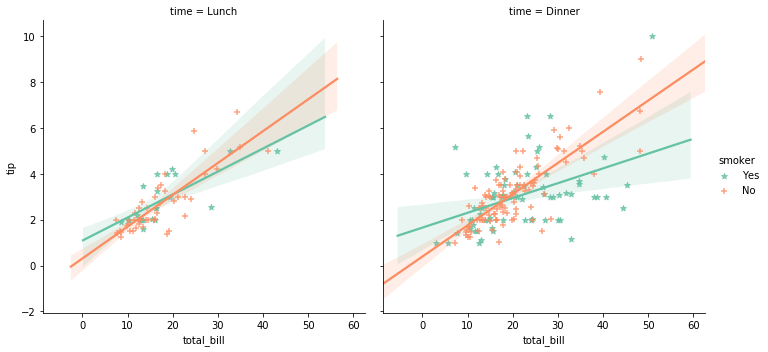

In [31]:
# Different categories
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", markers=["*","+"], palette="Set2", data=tips)

#### residplot

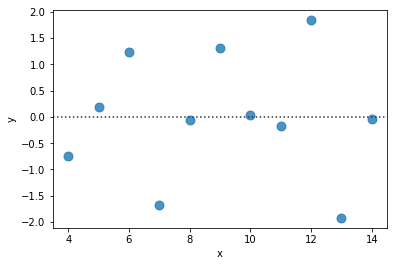

In [32]:
# random pattern (instead of a pattern) across y=0 means linear regression is best suited.
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80})